In [ ]:
import sys
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt 


In [ ]:
repo_root = Path.cwd().parents[1]
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from src.normalisers import NormaliseListings, NormaliseReviews

In [ ]:
data_path = repo_root/'data'/'raw'
reviews = pd.read_csv(data_path/'reviews.csv.gz')
listings = pd.read_csv(data_path/'listings.csv.gz')
calendar = pd.read_csv(data_path/'calendar.csv.gz')
wards = pd.read_csv(data_path/'wards.csv')

In [3]:
# Normalise data
# Reviews
normalise_reviews = NormaliseReviews(reviews)

# Reviews tables
review_comments = normalise_reviews.normalise_reviews()
reviewers = normalise_reviews.normalise_reviewers()

#Listings
normalise_listings = NormaliseListings(listings)

# Listings tables

unique_hosts = normalise_listings.normalise_hosts()
unique_listings = normalise_listings.normalise_listings()
neighbourhoods = normalise_listings.normalise_neighbourhoods()
listing_reviews = normalise_listings.normalise_listing_reviews()
neighbourhood_overviews = normalise_listings.normalise_neighbourhood_overview()

# AirBnB Dashboard Plan

1. Divide the data according to ward (dropdown)
2. Show count of unique lisings (card)
3. Show average rating (card)
4. Show avarage price (card)
5. Total Listings (card)
6. Total Hosts (card) 
7. Percent Superhosts (card)
8. Average Response Rate (card)
9. Average Acceptance Rate (card)
10. Reviews Sentiment Analysis (wordcloud)



In [4]:

listings_x_ratings = pd.merge(
    unique_listings, listing_reviews, on='listing_id', how='left'
)  
listings_x_ratings.head()

,listing_id,scrape_id,name,description,host_id,latitude,longitude,property_type,room_type,accommodates,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,15007,20250928034929,Blaauwberg House on the beach in Bloubergstrand,Welcome to our self-catering beach-front famil...,59072,-33.800010,18.460630,home,entire residence,6,...,2013-12-15,2024-10-19,4.81,4.91,4.83,4.98,4.94,4.94,4.85,0.33
1,15068,20250928034929,Grande Bay,Modern spacious apartment. Three bedrooms two...,59318,-33.788260,18.459400,rental unit,entire residence,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15077,20250928034929,Relaxed beach living in style,Our Superior Rooms (approx. 25 m²) are located...,59342,-33.858356,18.490376,room in rental unit,private room,2,...,2013-01-06,2022-06-16,5.00,4.86,4.86,4.86,4.71,4.86,5.00,0.05
3,15199,20250928034929,Self catering apartment,NaN,59694,-33.911150,18.412350,rental unit,entire residence,2,...,2014-03-04,2016-04-15,4.50,4.00,4.00,4.50,5.00,5.00,4.00,0.01
4,15354,20250928034929,"Aurora Self Catering Units, Durbanville, Cape ...",Durbanville is centrally located for daytrips ...,60196,-33.830740,18.631420,guest suite,entire residence,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
listings_x_ratings.dtypes

listing_id                        int64
scrape_id                         int64
name                             object
description                      object
host_id                           int64
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                      int64
bathrooms                       float64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
amenities                        object
price_usd                       Float64
estimated_occupancy_l365d         int64
estimated_revenue_l365d         float64
instant_bookable                   bool
neighbourhood_id                  int64
number_of_reviews                 int64
number_of_reviews_ltm             int64
number_of_reviews_l30d            int64
number_of_reviews_ly              int64
first_review                     object


## Ward Dropdown

In [6]:
wards['neighbourhood_id'] = wards['Name'].str.replace('Ward', '').str.strip().astype(int)   

new_wards = pd.merge(
    neighbourhoods,
    wards,
    on='neighbourhood_id',
    how='left'
)

new_wards.drop(columns=['neighbourhood_cleansed'], inplace=True)
new_wards.columns = [col.lower() for col in new_wards.columns]
new_wards.drop_duplicates(inplace=True)
new_wards['neighbourhood_id'] = new_wards['neighbourhood_id']
new_wards.sort_values('neighbourhood_id')


,neighbourhood_id,name,latitude,longitude
28,1,Ward 1,-33.878654,18.570032
6,2,Ward 2,-33.894026,18.602100
31,3,Ward 3,-33.892196,18.656065
1,4,Ward 4,-33.855849,18.514835
9,5,Ward 5,-33.870701,18.542310
...,...,...,...,...
67,111,Ward 111,-33.850344,18.724919
3,112,NaN,NaN,NaN
20,113,NaN,NaN,NaN
2,115,NaN,NaN,NaN


In [7]:
new_wards.loc[new_wards['name'].isna(), 'name'] = new_wards[new_wards['name'].isna()]['neighbourhood_id'].apply(lambda x: f"Ward {x}")

In [8]:
new_wards[new_wards['latitude'].isna()]

,neighbourhood_id,name,latitude,longitude
2,115,Ward 115,NaN,NaN
3,112,Ward 112,NaN,NaN
20,113,Ward 113,NaN,NaN
54,116,Ward 116,NaN,NaN


In [9]:
new_wards['neighbourhood_id'].dtype

dtype('int64')

In [10]:
unique_listings['neighbourhood_id'].dtype

dtype('int64')

In [11]:
# Get neighbourhood_ids with NaN latitude/longitude
nan_wards = new_wards[new_wards['latitude'].isna()]['neighbourhood_id'].unique().tolist()   

# For each ward with NaN coordinates, fill with mean from listings
for ward_id in nan_wards:
    #print("Filling coordinates for ward_id:", ward_id)
    mean_lat = unique_listings[unique_listings['neighbourhood_id'] == ward_id]['latitude'].mean()
    mean_lon = unique_listings[unique_listings['neighbourhood_id'] == ward_id]['longitude'].mean()
    #print("lat:", mean_lat, "lon:", mean_lon)
    new_wards.loc[new_wards['neighbourhood_id'] == ward_id, 'latitude'] = mean_lat
    new_wards.loc[new_wards['neighbourhood_id'] == ward_id, 'longitude'] = mean_lon

In [12]:
new_wards[new_wards['latitude'].isna()]

,neighbourhood_id,name,latitude,longitude


## Host Metrics

In [13]:
clean_hosts = unique_hosts.drop_duplicates(subset=['host_id'])
clean_hosts.drop(columns=['host_name', 'host_location', 'host_has_profile_pic', 'host_about', 'host_verifications'   ], inplace=True)

In [14]:
unique_hosts.head(10)

,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,59072,Dirk,2009-12-01,"Cape Town, South Africa",Proud to live in the beautiful city of Cape To...,within a few hours,100.0,88.0,False,7.0,19.0,"['email', 'phone', 'work_email']",True,True,1,1,0,0
1,59318,Linda,2009-12-02,<NA>,<NA>,a few days or more,0.0,33.0,False,7.0,20.0,"['email', 'phone']",True,True,5,5,0,0
2,59342,Georg,2009-12-02,Gibraltar,challenge us please! we love to perform!,within a few hours,100.0,80.0,False,7.0,7.0,"['email', 'phone']",True,True,6,1,5,0
3,59694,Alexa,2009-12-03,"Cape Town, South Africa",Professional businesswoman dedicated to provid...,<NA>,<NA>,<NA>,False,2.0,2.0,"['email', 'phone']",True,True,1,1,0,0
4,60196,Ian,2009-12-05,"Cape Town, South Africa",<NA>,<NA>,<NA>,<NA>,False,1.0,2.0,"['email', 'phone']",True,False,1,1,0,0
5,60443,Jean,2009-12-06,"Betty's Bay, South Africa",Like to be as accommodating and informative a...,a few days or more,0.0,0.0,False,2.0,2.0,"['email', 'phone']",True,True,1,1,0,0
6,61441,Kevin,2009-12-09,"Cape Town, South Africa",<NA>,within a few hours,100.0,100.0,False,7.0,7.0,"['email', 'phone', 'work_email']",True,True,7,7,0,0
7,63255,Cheryl,2009-12-15,"Cape Town, South Africa",Own Self Catering cottages in Cape Town,within an hour,100.0,83.0,True,3.0,3.0,"['email', 'phone']",True,True,3,2,1,0
8,71221,Abe,2010-01-17,"Cape Town, South Africa",Businessman rom Cape Town,<NA>,<NA>,<NA>,False,1.0,1.0,"['email', 'phone']",True,False,1,0,1,0
9,73439,Beverley,2010-01-25,"Cape Town, South Africa",We live in a beautiful leafy suburb of Cape To...,within a few hours,100.0,84.0,True,5.0,5.0,"['email', 'phone']",True,True,5,5,0,0


In [15]:
unique_hosts.dtypes

host_id                                                  int64
host_name                                       string[python]
host_since                                      string[python]
host_location                                   string[python]
host_about                                      string[python]
host_response_time                              string[python]
host_response_rate                                     Float64
host_acceptance_rate                                   Float64
host_is_superhost                                         bool
host_listings_count                                    float64
host_total_listings_count                              float64
host_verifications                              string[python]
host_has_profile_pic                                      bool
host_identity_verified                                    bool
calculated_host_listings_count                           int64
calculated_host_listings_count_entire_homes            

In [16]:
total_hosts = unique_hosts.shape[0]
print("Total hosts:", total_hosts)

Total hosts: 14134


In [17]:
num_superhosts = unique_hosts['host_is_superhost'].sum()
print("Number of superhosts:", num_superhosts)
percent_superhosts = (num_superhosts / total_hosts) * 100
print("Percent superhosts:", percent_superhosts)

Number of superhosts: 3559
Percent superhosts: 25.18041601811235


In [18]:
ward = 1
filtered_listings = listings_x_ratings[listings_x_ratings['neighbourhood_id'] == ward]
filtered_listings.shape
filtered_listings.host_id.unique()

array([  9752740,  26564335,  43741993,  50715882,  50722620,  52787977,
        60981222,  56557141,  73885825,  85808883,  87188778,  87661242,
       104111522, 104749994, 105665540,  75764692,  43165399, 136156678,
        47435679, 148022639, 118995155, 153283820,  89839228, 155794491,
       158279250, 161555209,  84705605,  86243595, 172163084, 165445882,
       181021441, 184339098, 188474329, 190581790, 168133300, 132755819,
       229976526, 169476286, 240853629, 274676442, 279696219, 168389350,
       286152157, 186103957,  30248864, 121528558, 217179711, 254461565,
       220885221, 230352627, 341686124, 226054672,  72459979, 257121070,
       315264981, 371605160, 373569876, 392471309, 127854974, 222255161,
       399085675, 414303207, 119746967, 299992602, 402009049, 147173769,
       137118143, 432023798, 138954647, 187421610, 171972024,  45577453,
        30368501,  59108572, 104783163, 209176997, 464521098, 242208883,
       477071182, 442172606, 275726377, 211270409, 

In [19]:
unique_hosts[unique_hosts['host_id'].isin(filtered_listings['host_id'].unique())]

,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
206,3961453,Host Agents,2012-10-24,<NA>,"We operate with guest's best interest in mind,...",within an hour,100.0,100.0,False,108.0,167.0,['phone'],True,True,100,100,0,0
209,9752740,Jane Christine Beatrix,2013-11-01,"Cape Town, South Africa",I am a South African lady married to a Portugu...,within an hour,100.0,100.0,True,2.0,4.0,"['email', 'phone']",True,True,2,2,0,0
720,26564335,Esther,2015-01-23,"Cape Town, South Africa",Welcome!!! I am waiting for you in Cape town....,<NA>,<NA>,<NA>,False,1.0,1.0,"['email', 'phone']",True,False,1,0,1,0
1194,43741993,Willem,2015-09-09,"Cape Town, South Africa",<NA>,<NA>,<NA>,<NA>,False,1.0,1.0,"['email', 'phone']",True,False,1,1,0,0
1613,50715882,Maree,2015-12-07,"Cape Town, South Africa","Are you looking for a family home, where your ...",<NA>,<NA>,<NA>,False,1.0,1.0,"['email', 'phone', 'work_email']",True,False,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24898,517318539,Giovanni Alexandre,2023-05-30,"Cape Town, South Africa",I’m a student who loves playing padel and bein...,<NA>,<NA>,<NA>,False,2.0,3.0,['phone'],True,True,2,2,0,0
24952,699111688,Micheal,2025-06-03,<NA>,<NA>,within an hour,100.0,75.0,False,1.0,1.0,"['email', 'phone']",False,True,1,1,0,0
25423,706217019,Ronell,2025-07-09,"Cape Town, South Africa",<NA>,within an hour,100.0,97.0,False,5.0,5.0,"['email', 'phone']",False,True,5,3,2,0
25427,703608224,Tshilidzi Adelphia,2025-06-26,<NA>,<NA>,<NA>,<NA>,<NA>,False,7.0,7.0,"['email', 'phone']",True,True,7,2,5,0


In [20]:
total_hosts = unique_hosts['host_id'].nunique()
mean_response_rate = unique_hosts['host_response_rate'].mean()
mean_acceptance_rate = unique_hosts['host_acceptance_rate'].mean()
super_hosts_count = unique_hosts['host_is_superhost'].sum()
verified_hosts_count = unique_hosts['host_identity_verified'].sum()  
print("Total hosts:", total_hosts)
print("Superhosts count:", super_hosts_count)
print("Verified hosts count:", verified_hosts_count)

get_percent = lambda x: x / total_hosts * 100 if total_hosts > 0 else 0
super_hosts_percent = get_percent(super_hosts_count)
verified_hosts_percent = get_percent(verified_hosts_count)


metrics = {     
            'total_hosts': total_hosts,
            'mean_response_rate': mean_response_rate,
            'mean_acceptance_rate': mean_acceptance_rate,
            'super_hosts_percent': super_hosts_percent,
            'verified_hosts_percent': verified_hosts_percent
        }

Total hosts: 14134
Superhosts count: 3559
Verified hosts count: 12891


## Room Type Breakdowns

In [21]:
listings_x_ratings.columns

Index(['listing_id', 'scrape_id', 'name', 'description', 'host_id', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price_usd',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'instant_bookable', 'neighbourhood_id', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'number_of_reviews_ly', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [22]:
listings_x_ratings[['listing_id', 'neighbourhood_id', 'property_type', 'room_type', 'accommodates','estimated_occupancy_l365d' ,'estimated_revenue_l365d','price_usd', 'review_scores_rating']].head()

,listing_id,neighbourhood_id,property_type,room_type,accommodates,estimated_occupancy_l365d,estimated_revenue_l365d,price_usd,review_scores_rating
0,15007,23,home,entire residence,6,6,13890.0,2315.0,4.81
1,15068,23,rental unit,entire residence,6,0,0.0,4785.0,NaN
2,15077,4,room in rental unit,private room,2,0,0.0,1118.0,5.00
3,15199,115,rental unit,entire residence,2,0,0.0,2250.0,4.50
4,15354,112,guest suite,entire residence,3,0,NaN,<NA>,NaN


In [23]:
typed_group_listings = listings_x_ratings.groupby(['room_type', 'property_type']).agg({
    'listing_id': 'count',
    'estimated_revenue_l365d': 'mean'
}).sort_values('listing_id', ascending=False).reset_index().rename(columns={
    'listing_id': 'count',
    'estimated_revenue_l365d': 'mean_revenue'
})

/var/folders/bt/k03lqn9d12n_cx4lgr39w0v80000gn/T/ipykernel_73380/1753675519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  typed_group_listings = listings_x_ratings.groupby(['room_type', 'property_type']).agg({


In [24]:
typed_group_listings.head()

,room_type,property_type,count,mean_revenue
0,entire residence,rental unit,11461,92412.832805
1,entire residence,home,5497,118459.530590
2,private room,room in home,1587,21785.434466
3,entire residence,condo,1157,151041.734266
4,entire residence,guest suite,1001,69665.836237


In [25]:
import plotly.express as px
import pandas as pd

# Create hierarchical dataframe
data = pd.DataFrame({
    'labels': typed_group_listings['property_type'].tolist(),
    'parents': typed_group_listings['room_type'].tolist(),
    'values': typed_group_listings['count'].tolist()
})

fig = px.sunburst(
    typed_group_listings,  # Pass the DataFrame directly to px.sunbur
    color='mean_revenue',  # Use 'count' for color encoding
    values='count',  # Specify the values for the sunburst chart
    path = ['room_type', 'property_type'],  # Define the hierarchy using the 'path' parameter
    hover_name='property_type',  # Show property type on hover
    height=700,
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    height=700,
    paper_bgcolor='#0D1116',
    plot_bgcolor='#0D1116',
    font=dict(color='white', size=14),
    margin=dict(t=50, l=0, r=0, b=0),
    uniformtext=dict(minsize=9, mode='hide')
)

fig.update_traces(
    marker=dict(
        line=dict(color='#0D1116', width=2)  # Thicker borders for separation
    ),
    insidetextorientation='radial'
)

fig.show()

In [26]:

fig = px.treemap(
    typed_group_listings,
    path=[px.Constant("listings"), 'room_type', 'property_type'],
    values='count',
    color='mean_revenue',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    height=700,
    paper_bgcolor='#0D1116',
    plot_bgcolor='#0D1116',
    font=dict(color='white', size=14),
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.update_coloraxes(colorbar_title_text="Average Annual Revenue")

fig.update_traces(
    marker=dict(
        line=dict(width=0)  # Remove all borders
    )
)

fig.show()

## Wordcloud

In [27]:
neighbourhood_overviews.head()

,listing_id,neighbourhood_id,neighbourhood,neighbourhood_overview
0,15007,23,"Cape Town, Western Cape, South Africa","Bloubergstrand is a lovely, cosy suburb near C..."
1,15068,23,"Cape Town, Western Cape, South Africa",Close to Eden on The Bay and lots of restauran...
2,15077,4,"Tableview - Sunset Beach, Cape Town, South Africa",It is probably the best hub in order to explor...
3,15199,115,NaN,NaN
4,15354,112,"Durbanville, Western Cape, South Africa",Durbanville is a really lovely village half an...


In [28]:
neighbourhood_overviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26875 entries, 0 to 26876
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   listing_id              26875 non-null  int64 
 1   neighbourhood_id        26875 non-null  int64 
 2   neighbourhood           12831 non-null  object
 3   neighbourhood_overview  12831 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [29]:
neighbourhood_overviews = neighbourhood_overviews.dropna(subset=['neighbourhood_id', 'neighbourhood_overview'])
neighbourhood_overviews['neighbourhood_overview'] = neighbourhood_overviews['neighbourhood_overview'].str.strip().str.lower()

In [30]:
# Dictionary mapping contractions to their expanded forms
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

In [32]:
import re, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords', 'wordnet', 'omw-1.4'])

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katlegothobye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/katlegothobye/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/katlegothobye/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [34]:
df_cleaned_overviews = neighbourhood_overviews.copy()
df_cleaned_overviews['cleaned_overview'] = df_cleaned_overviews['neighbourhood_overview'].apply(preprocess)

In [35]:
df_cleaned_overviews.head()

,listing_id,neighbourhood_id,neighbourhood,neighbourhood_overview,cleaned_overview
0,15007,23,"Cape Town, Western Cape, South Africa","bloubergstrand is a lovely, cosy suburb near c...",bloubergstrand lovely cosy suburb near cape to...
1,15068,23,"Cape Town, Western Cape, South Africa",close to eden on the bay and lots of restauran...,close eden bay lot restaurant area
2,15077,4,"Tableview - Sunset Beach, Cape Town, South Africa",it is probably the best hub in order to explor...,probably best hub order explore cape town surr...
4,15354,112,"Durbanville, Western Cape, South Africa",durbanville is a really lovely village half an...,durbanville really lovely village half hour ca...
5,15480,115,"Cape Town, Western Cape, South Africa","the hip creative and design of cape town, loa...",hip creative design cape town load young peopl...


In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df_cleaned_overviews['sentiment_scores'] = df_cleaned_overviews['cleaned_overview'].apply(lambda x: analyzer.polarity_scores(x))

In [37]:
df_cleaned_overviews.head()

,listing_id,neighbourhood_id,neighbourhood,neighbourhood_overview,cleaned_overview,sentiment_scores
0,15007,23,"Cape Town, Western Cape, South Africa","bloubergstrand is a lovely, cosy suburb near c...",bloubergstrand lovely cosy suburb near cape to...,"{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'comp..."
1,15068,23,"Cape Town, Western Cape, South Africa",close to eden on the bay and lots of restauran...,close eden bay lot restaurant area,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,15077,4,"Tableview - Sunset Beach, Cape Town, South Africa",it is probably the best hub in order to explor...,probably best hub order explore cape town surr...,"{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp..."
4,15354,112,"Durbanville, Western Cape, South Africa",durbanville is a really lovely village half an...,durbanville really lovely village half hour ca...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou..."
5,15480,115,"Cape Town, Western Cape, South Africa","the hip creative and design of cape town, loa...",hip creative design cape town load young peopl...,"{'neg': 0.017, 'neu': 0.623, 'pos': 0.36, 'com..."


In [38]:
df_cleaned_overviews['compound_sentiment'] = df_cleaned_overviews['sentiment_scores'].apply(lambda x: x['compound'])

In [40]:
df_cleaned_overviews['sentiment_label'] = df_cleaned_overviews['compound_sentiment'].apply(
    lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
)

In [42]:
df_cleaned_overviews[['neighbourhood_id', 'cleaned_overview', 'compound_sentiment','sentiment_label']].head()

,neighbourhood_id,cleaned_overview,compound_sentiment,sentiment_label
0,23,bloubergstrand lovely cosy suburb near cape to...,0.9850,positive
1,23,close eden bay lot restaurant area,0.0000,neutral
2,4,probably best hub order explore cape town surr...,0.8934,positive
4,112,durbanville really lovely village half hour ca...,0.8944,positive
5,115,hip creative design cape town load young peopl...,0.9920,positive


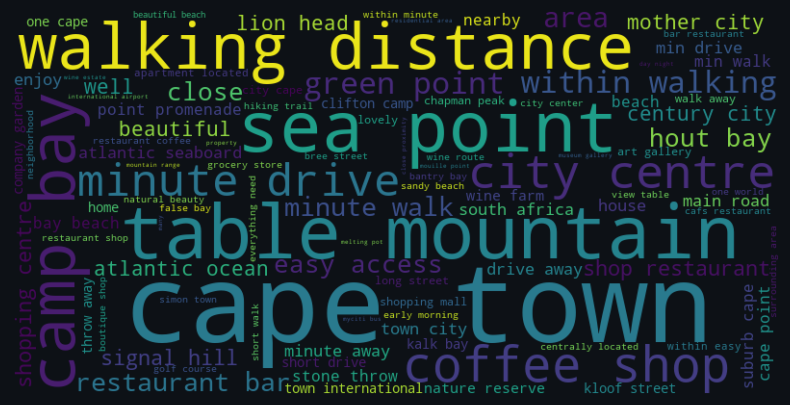

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt




positive_reviews = ' '.join(df_cleaned_overviews['cleaned_overview'])
wc = WordCloud(width=800, height=400, background_color='#0D1116', 
               colormap='viridis', max_words=100).generate(positive_reviews)

fig, ax = plt.subplots(figsize=(10,5), facecolor='#0D1116') 
ax.imshow(wc, interpolation='bilinear')
ax.axis('off')
ax.set_facecolor('#0D1116')
plt.show()

np.float64(0.7026621775387734)

In [ ]:
df_cleaned_overviews['compound_sentiment'].mean()
sentiment_proportions = df_cleaned_overviews['sentiment_label'].value_counts() / len(df_cleaned_overviews)

# Extract each sentiment as a discrete variable
positive = sentiment_proportions.get('positive', 0)
negative = sentiment_proportions.get('negative', 0)
neutral = sentiment_proportions.get('neutral', 0)